In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import torch

In [2]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True

# Load data

In [3]:
from torchvision import transforms
transformation = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])

In [4]:
from torchvision import datasets

train_dataset = datasets.MNIST('data/', train=True, transform=transformation, download=True)
test_dataset = datasets.MNIST('data/', train=False, transform=transformation, download=True)

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw
Processing...
Done!


C:\Users\Yeonkang\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [6]:
def plot_img(image):
    image = image.numpy()[0] #1
    mean = 0.1307
    std = 0.3081
    image = ((std*image) + mean) #2
    plt.imshow(image, cmap='gray') #3

In [7]:
sample_data = next(iter(train_loader))
sample_data

[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
       

- Extract random data from train_loader
- Different output for each implementation

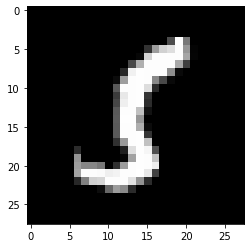

In [8]:
plot_img(sample_data[0][0])

# Build Convolutional Neural Network

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=0)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        y = x.view(-1,320)
        return x,y

In [10]:
from torch.autograd import Variable

def fit(epoch, model, data_loader, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile = True
    running_loss = 0.0
    running_correct = 0
    for batch_idx, (data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data,target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        x,y = model(data)
            
    return x,y

In [11]:
import torch.optim as optim

model = Net()
if is_cuda:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
x,y = fit(1, model, train_loader, phase='training')

In [12]:
x.shape

torch.Size([32, 20, 4, 4])

In [13]:
y.shape

torch.Size([32, 320])

In [14]:
x.view(320,-1).shape

torch.Size([320, 32])

- Code for understanding how does *view* work

In [15]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=0)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [16]:
def fit(epoch, model, data_loader, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile = True
    running_loss = 0.0
    running_correct = 0
    for batch_idx, (data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data,target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output,target)
        
        running_loss += F.nll_loss(output, target, reduction='mean').data
        preds = output.data.max(dim=1, keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
            
    loss = running_loss.item()/len(data_loader.dataset)
    accuracy = 100.0 * running_correct.item()/len(data_loader.dataset)
            
    print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)} {accuracy:{10}.{4}}')
    return loss,accuracy

In [17]:
a = torch.randn(4, 4)
a

tensor([[ 0.2493, -0.1129,  0.8700, -1.7961],
        [ 0.1908,  0.2901, -0.8998, -0.8889],
        [ 0.9308,  0.9188,  0.7628, -0.1550],
        [-0.5168, -0.0482, -0.0966,  1.5973]])

In [18]:
torch.max(a, 1)

torch.return_types.max(
values=tensor([0.8700, 0.2901, 0.9308, 1.5973]),
indices=tensor([2, 1, 0, 3]))

In [19]:
torch.max(a,1,keepdim=True)

torch.return_types.max(
values=tensor([[0.8700],
        [0.2901],
        [0.9308],
        [1.5973]]),
indices=tensor([[2],
        [1],
        [0],
        [3]]))

- Code for understanding how does *output.data.max* work

In [20]:
import torch.optim as optim

model = Net()
if is_cuda:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
train_losses,train_accuracy = [],[]
val_losses,val_accuracy = [],[]

for epoch in range(1,20):
    train_epoch_loss,train_epoch_accuracy = fit(epoch, model, train_loader, phase='training')
    val_epoch_loss,val_epoch_accuracy = fit(epoch, model, test_loader,phase='validation')
    train_losses.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

training loss is 0.021 and training accuracy is 47022/60000      78.37
validation loss is 0.004 and validation accuracy is 9614/10000      96.14
training loss is 0.0094 and training accuracy is 54627/60000      91.05
validation loss is 0.0027 and validation accuracy is 9711/10000      97.11
training loss is 0.0074 and training accuracy is 55847/60000      93.08
validation loss is 0.0021 and validation accuracy is 9789/10000      97.89
training loss is 0.0066 and training accuracy is 56218/60000       93.7
validation loss is 0.0019 and validation accuracy is 9813/10000      98.13
training loss is 0.0059 and training accuracy is 56653/60000      94.42
validation loss is 0.0017 and validation accuracy is 9832/10000      98.32
training loss is 0.0055 and training accuracy is 56920/60000      94.87
validation loss is 0.0018 and validation accuracy is 9823/10000      98.23
training loss is 0.0052 and training accuracy is 57078/60000      95.13
validation loss is 0.0015 and validation accurac

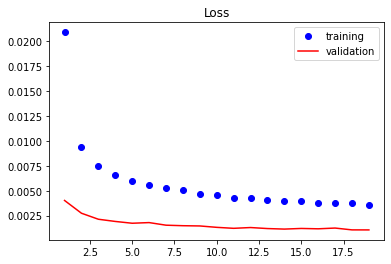

In [21]:
plt.plot(range(1,len(train_losses)+1), train_losses, 'bo', label='training')
plt.plot(range(1,len(val_losses)+1), val_losses, 'r', label='validation')
plt.title('Loss')
plt.legend()

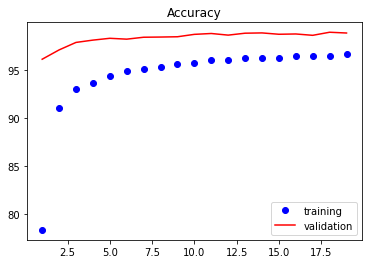

In [22]:
plt.plot(range(1,len(train_accuracy)+1), train_accuracy, 'bo', label='training')
plt.plot(range(1,len(val_accuracy)+1), val_accuracy, 'r', label='validation')
plt.title('Accuracy')
plt.legend()